In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

np.random.seed(1)

In [2]:
def evaluate_preds(y_true, y_preds):
    r2 = r2_score(y_true, y_preds)
    mae = mean_absolute_error(y_true, y_preds)
    mse = mean_squared_error(y_true, y_preds)
    metrics_dict = {'r2': round(r2, 2),
                    'MAE': round(mae, 2),
                    'MSE': round(mse, 2),
                    }
    return metrics_dict

# Data Exploration Analysis

In [3]:
df = pd.read_csv('TrainAndValid.csv', low_memory=False)

In [4]:
df.shape

(412698, 53)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [8]:
df.duplicated().sum()

0

In [9]:
df.saledate = pd.to_datetime(df.saledate)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [11]:
df = df.sort_values(by='saledate')

In [12]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [13]:
df_saleprice_over_time = df[['SalePrice', 'saledate']].set_index('saledate')
df_saleprice_over_time['Date'] = df_saleprice_over_time.index.values
df_saleprice_over_time.head()

,SalePrice,Date
saledate,,
1989-01-17,9500.0,1989-01-17
1989-01-31,14000.0,1989-01-31
1989-01-31,50000.0,1989-01-31
1989-01-31,16000.0,1989-01-31
1989-01-31,22000.0,1989-01-31


In [14]:
df_saleprice_over_time_monthly = df_saleprice_over_time.resample('M', on='Date').last()
df_saleprice_over_time_monthly

,SalePrice,Date
Date,,
1989-01-31,28000.0,1989-01-31
1989-02-28,10500.0,1989-02-28
1989-03-31,32000.0,1989-03-30
1989-04-30,11750.0,1989-04-29
1989-05-31,10000.0,1989-05-25
...,...,...
2011-12-31,13500.0,2011-12-30
2012-01-31,70000.0,2012-01-31
2012-02-29,47000.0,2012-02-29


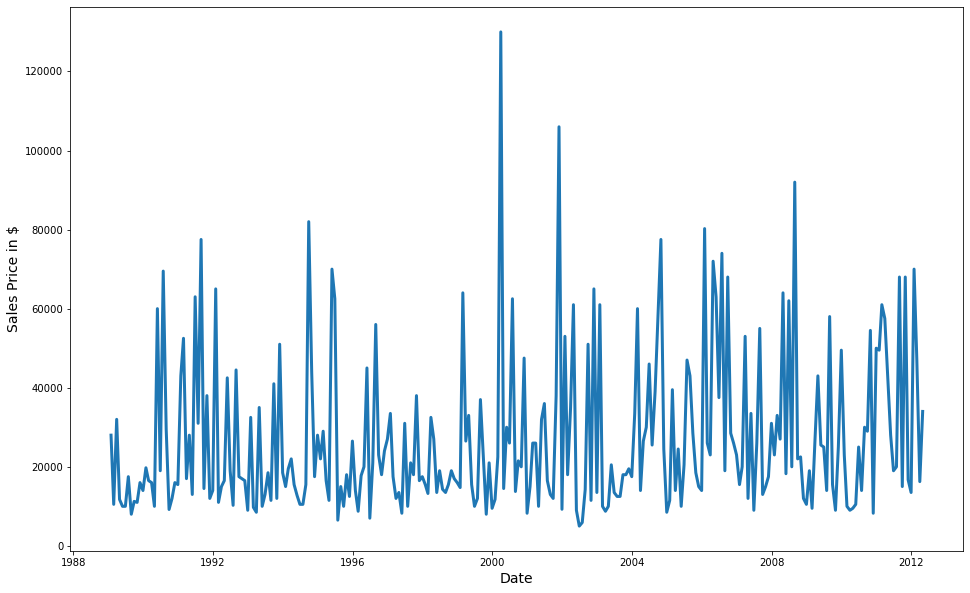

In [15]:
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales Price in $', fontsize=14)
plt.plot(df_saleprice_over_time_monthly.index, df_saleprice_over_time_monthly.SalePrice, linewidth=3)

# Data Cleaning

In [16]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [17]:
df_sel = df[['SalePrice', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'Drive_System', 'ProductSize', 'Transmission', 'Enclosure', 'Stick']].copy()

In [18]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalePrice                 412698 non-null  float64
 1   YearMade                  412698 non-null  int64  
 2   MachineHoursCurrentMeter  147504 non-null  float64
 3   UsageBand                 73670 non-null   object 
 4   Drive_System              107087 non-null  object 
 5   ProductSize               196093 non-null  object 
 6   Transmission              188007 non-null  object 
 7   Enclosure                 412364 non-null  object 
 8   Stick                     81096 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 31.5+ MB


In [19]:
df_clean = df_sel.dropna(subset='MachineHoursCurrentMeter').copy()

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147504 entries, 24621 to 402531
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalePrice                 147504 non-null  float64
 1   YearMade                  147504 non-null  int64  
 2   MachineHoursCurrentMeter  147504 non-null  float64
 3   UsageBand                 73670 non-null   object 
 4   Drive_System              36199 non-null   object 
 5   ProductSize               70490 non-null   object 
 6   Transmission              65588 non-null   object 
 7   Enclosure                 147403 non-null  object 
 8   Stick                     27037 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 11.3+ MB


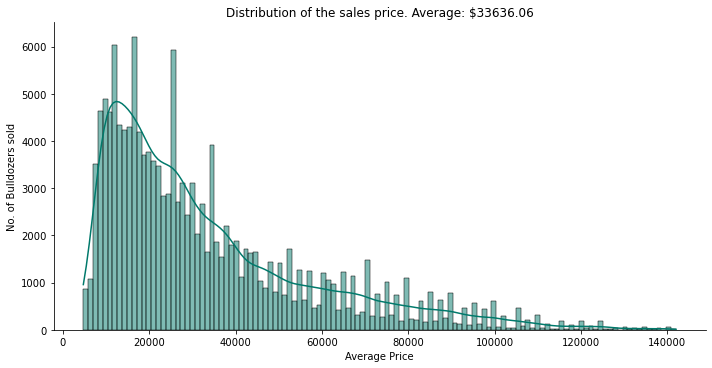

In [21]:
sns.displot(df_clean.SalePrice, 
            aspect=2,
            kde=True, 
            color='#00796b')

plt.title(f'Distribution of the sales price. Average: ${df_clean.SalePrice.mean():.02f}')
plt.xlabel('Average Price')
plt.ylabel('No. of Bulldozers sold')

plt.show()

# Simple Linear Regression

In [99]:
X = df_clean.drop('SalePrice', axis=1)
y = df_clean['SalePrice']

In [100]:
X.shape, y.shape

((147504, 8), (147504,))

In [101]:
X.head()

,YearMade,MachineHoursCurrentMeter,UsageBand,Drive_System,ProductSize,Transmission,Enclosure,Stick
24621,1986,400.0,Low,Two Wheel Drive,NaN,Standard,OROPS,Standard
24585,1987,254.0,Low,Four Wheel Drive,NaN,Standard,OROPS,Standard
31251,1981,100.0,Low,Two Wheel Drive,NaN,Standard,EROPS,Standard
87434,1979,5439.0,Medium,NaN,Large / Medium,NaN,EROPS,NaN
66222,1987,729.0,Medium,NaN,NaN,NaN,EROPS,NaN


In [102]:
cat_features = ['YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'Drive_System', 'ProductSize', 'Transmission', 'Enclosure', 'Stick']

In [103]:
cat_imputer = SimpleImputer(strategy='constant', fill_value='unknown')

In [104]:
imputer = ColumnTransformer([('cat_imputer', cat_imputer, cat_features)])

In [105]:
filled_X = imputer.fit_transform(X)

In [106]:
filled_X

array([[1986, 400.0, 'Low', ..., 'Standard', 'OROPS', 'Standard'],
       [1987, 254.0, 'Low', ..., 'Standard', 'OROPS', 'Standard'],
       [1981, 100.0, 'Low', ..., 'Standard', 'EROPS', 'Standard'],
       ...,
       [2004, 4743.0, 'Medium', ..., 'unknown', 'EROPS w AC', 'unknown'],
       [2000, 0.0, 'unknown', ..., 'unknown', 'EROPS w AC', 'unknown'],
       [1996, 8955.0, 'Medium', ..., 'unknown', 'EROPS w AC', 'unknown']],
      dtype=object)

In [107]:
filled_X.shape

(147504, 8)

In [108]:
filled_X = pd.DataFrame(data=filled_X, columns=(X.columns))

In [109]:
filled_X.head()

,YearMade,MachineHoursCurrentMeter,UsageBand,Drive_System,ProductSize,Transmission,Enclosure,Stick
0,1986,400.0,Low,Two Wheel Drive,unknown,Standard,OROPS,Standard
1,1987,254.0,Low,Four Wheel Drive,unknown,Standard,OROPS,Standard
2,1981,100.0,Low,Two Wheel Drive,unknown,Standard,EROPS,Standard
3,1979,5439.0,Medium,unknown,Large / Medium,unknown,EROPS,unknown
4,1987,729.0,Medium,unknown,unknown,unknown,EROPS,unknown


In [110]:
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, cat_features)],
                                remainder='passthrough')

In [111]:
transformed_X = transformer.fit_transform(filled_X)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [36]:
reg = LinearRegression()

In [37]:
%%time
reg.fit(X_train, y_train)

CPU times: total: 8.38 s
Wall time: 1.06 s


LinearRegression()

In [38]:
y_pred = reg.predict(X_test)

In [39]:
baseline_linear_regression = evaluate_preds(y_test, y_pred)
baseline_linear_regression

{'r2': 0.54, 'MAE': 12380.26, 'MSE': 279458737.46}

In [40]:
predicted_vals = reg.predict(X_train)
residuals = (y_train - predicted_vals)

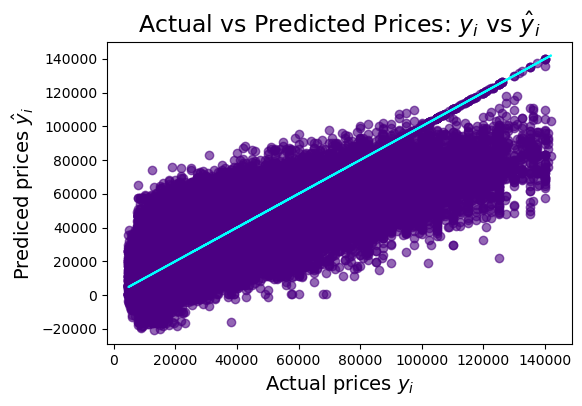

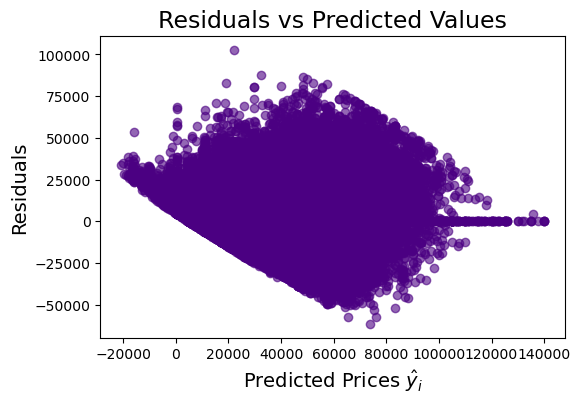

In [41]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices $y _i$', fontsize=14)
plt.ylabel('Prediced prices $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

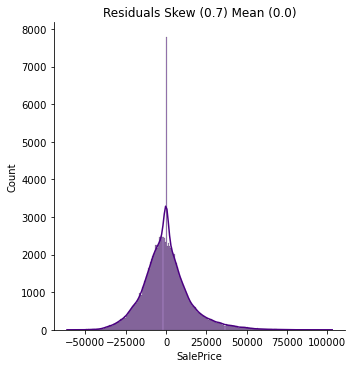

In [42]:
# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

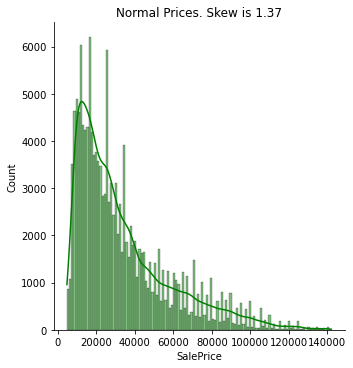

In [43]:
tgt_skew = y.skew()
sns.displot(y, kde='kde', color='green')
plt.title(f'Normal Prices. Skew is {tgt_skew:.3}')
plt.show()

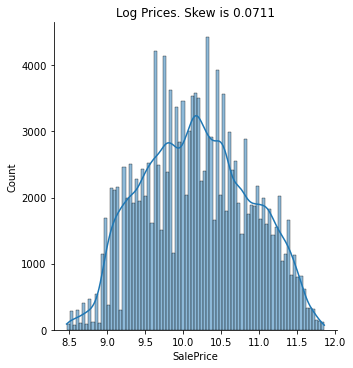

In [44]:
y_log = np.log(y)
sns.displot(y_log, kde=True)
plt.title(f'Log Prices. Skew is {y_log.skew():.3}')
plt.show()

# Random Forest

In [113]:
rf_reg = RandomForestRegressor(n_jobs=-1)

In [114]:
%%time
rf_reg.fit(X_train, y_train)

CPU times: total: 16min 15s
Wall time: 1min 7s


RandomForestRegressor(n_jobs=-1)

In [115]:
y_pred = rf_reg.predict(X_test)

In [116]:
baseline_rf_regression = evaluate_preds(y_test, y_pred)
baseline_rf_regression

{'r2': 0.65, 'MAE': 9573.1, 'MSE': 212740943.11}

In [117]:
predicted_vals = rf_reg.predict(X_train)
residuals = (y_train - predicted_vals)

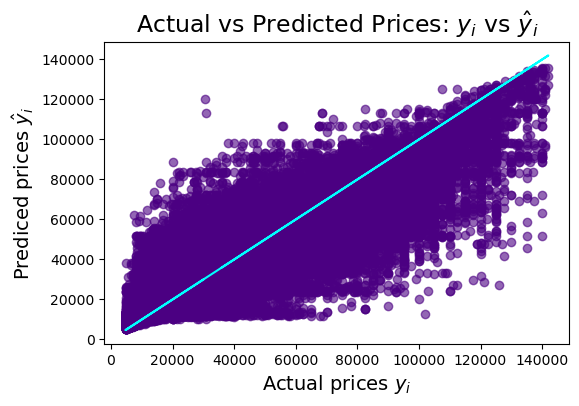

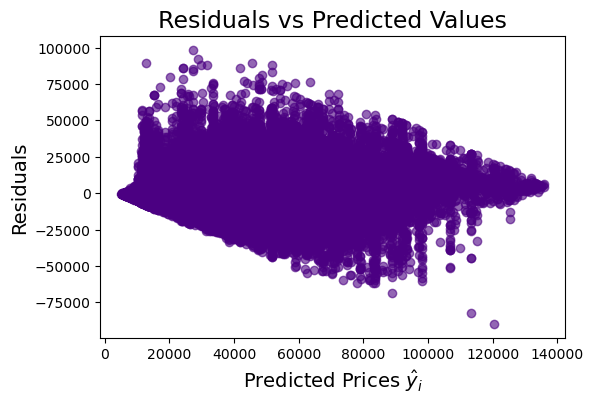

In [118]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices $y _i$', fontsize=14)
plt.ylabel('Prediced prices $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

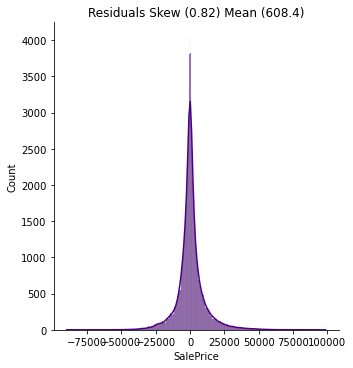

In [119]:
# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

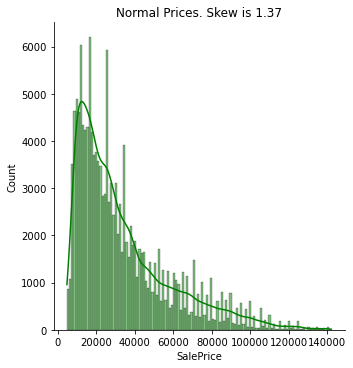

In [120]:
tgt_skew = y.skew()
sns.displot(y, kde='kde', color='green')
plt.title(f'Normal Prices. Skew is {tgt_skew:.3}')
plt.show()

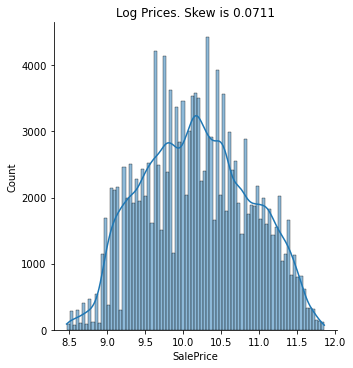

In [121]:
y_log = np.log(y)
sns.displot(y_log, kde=True)
plt.title(f'Log Prices. Skew is {y_log.skew():.3}')
plt.show()

In [158]:
X_features = transformer.get_feature_names_out()

In [159]:
feature_importance = rf_reg.feature_importances_
feature_importance

array([1.15881147e-02, 4.99158785e-07, 4.06232262e-06, ...,
       1.55437438e-04, 1.46059555e-04, 1.28839764e-02])

In [160]:
feature_importance = (pd.DataFrame({"features": X_features,
                        "feature_importances": feature_importance})
                      .sort_values("feature_importances", ascending=False)
                      .reset_index(drop=True))

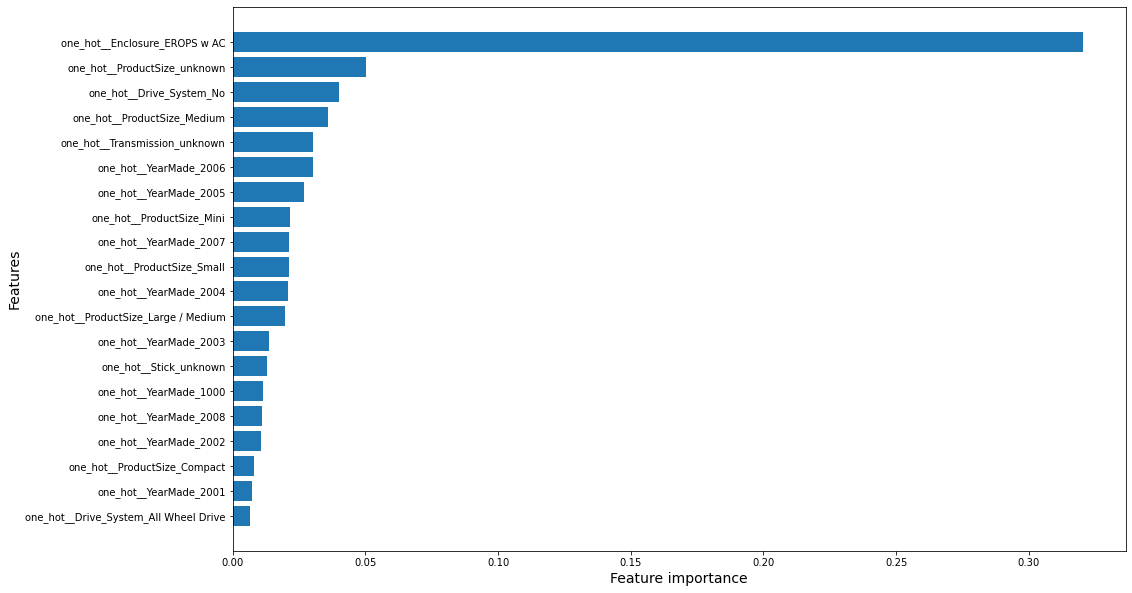

In [168]:
top_n_features = 20
fig, ax = plt.subplots(figsize=(16,10))
ax.barh(feature_importance["features"][:top_n_features], feature_importance["feature_importances"][:top_n_features])
ax.set_ylabel("Features", fontsize=14)
ax.set_xlabel("Feature importance", fontsize=14)
ax.invert_yaxis()

# Simple Linear Regression Using Pipeline

In [58]:
X = df_clean.drop('SalePrice', axis=1)
y = df_clean['SalePrice']

In [59]:
cat_features = ['YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'Drive_System', 'ProductSize', 'Transmission', 'Enclosure', 'Stick']

In [60]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [61]:
preprocessor = ColumnTransformer(transformers=[
    ('cat_transformer', cat_transformer, cat_features)
])

In [62]:
linear_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('model', LinearRegression()),
])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
linear_regression_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['YearMade',
                                                   'MachineHoursCurrentMeter',
                                                   'UsageBand', 'Drive_System',
                                                   'ProductSize',
                                                   'Transmission', 'Enclosure',
                                                   'Stick'

In [65]:
y_pred = linear_regression_model.predict(X_test)

In [66]:
baseline_linear_regression = evaluate_preds(y_test, y_pred)
baseline_linear_regression

{'r2': 0.53, 'MAE': 12343.65, 'MSE': 277890229.63}

# Random Forest Regression Using Pipeline

In [68]:
X = df_clean.drop('SalePrice', axis=1)
y = df_clean['SalePrice']

In [69]:
cat_features = ['YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'Drive_System', 'ProductSize', 'Transmission', 'Enclosure', 'Stick']

In [70]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [71]:
preprocessor = ColumnTransformer(transformers=[
    ('cat_transformer', cat_transformer, cat_features)
])

In [72]:
rf_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('model', RandomForestRegressor()),
])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
rf_regression_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['YearMade',
                                                   'MachineHoursCurrentMeter',
                                                   'UsageBand', 'Drive_System',
                                                   'ProductSize',
                                                   'Transmission', 'Enclosure',
                                                   'Stick'

In [75]:
y_pred = rf_regression_model.predict(X_test)

In [76]:
baseline_rf_regression = evaluate_preds(y_test, y_pred)
baseline_rf_regression

{'r2': 0.66, 'MAE': 9468.25, 'MSE': 209060658.97}

In [79]:
compare_metrics = pd.DataFrame({'linear regression': baseline_linear_regression,
                                     'rf_baseline': baseline_rf_regression})

<AxesSubplot:>

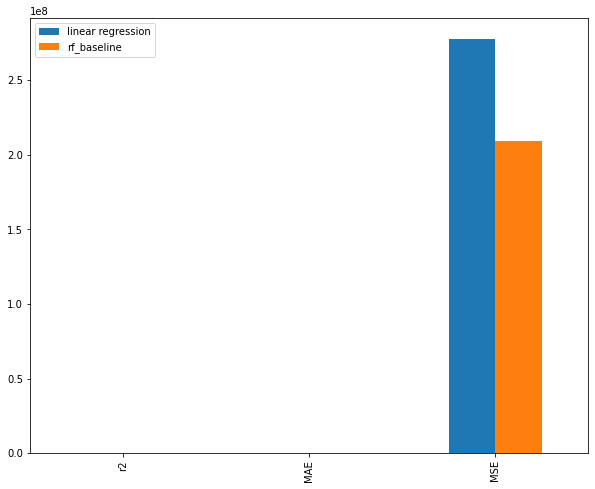

In [82]:
compare_metrics.plot.bar(figsize=(10, 8))

# Adjusting the input [log]

In [188]:
X = df_clean.drop('SalePrice', axis=1)
y = df_clean['SalePrice']

In [189]:
X.head()

,YearMade,MachineHoursCurrentMeter,UsageBand,Drive_System,ProductSize,Transmission,Enclosure,Stick
24621,1986,400.0,Low,Two Wheel Drive,NaN,Standard,OROPS,Standard
24585,1987,254.0,Low,Four Wheel Drive,NaN,Standard,OROPS,Standard
31251,1981,100.0,Low,Two Wheel Drive,NaN,Standard,EROPS,Standard
87434,1979,5439.0,Medium,NaN,Large / Medium,NaN,EROPS,NaN
66222,1987,729.0,Medium,NaN,NaN,NaN,EROPS,NaN


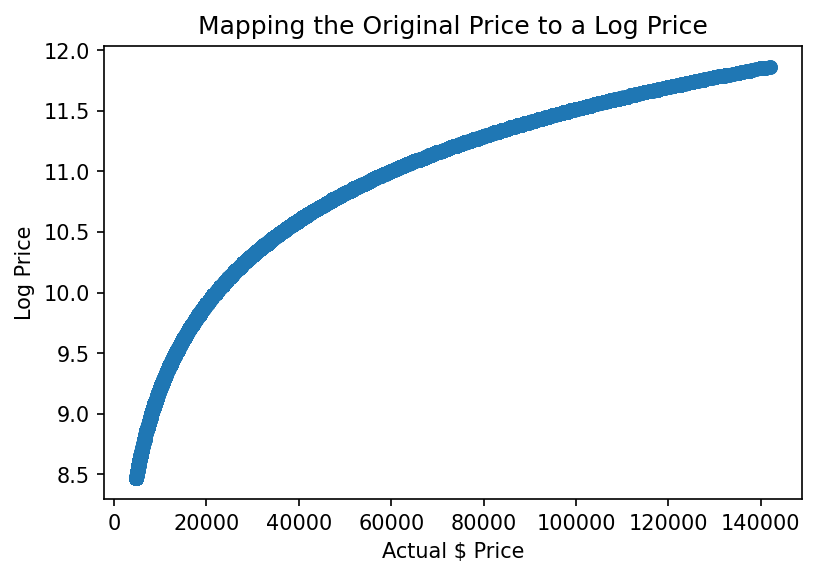

In [190]:
plt.figure(dpi=150)
plt.scatter(y, np.log(y))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price')
plt.show()

In [191]:
y = np.log(y)

In [192]:
cat_features = ['YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'Drive_System', 'ProductSize', 'Transmission', 'Enclosure', 'Stick']

In [193]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [194]:
preprocessor = ColumnTransformer(transformers=[
    ('cat_transformer', cat_transformer, cat_features)
])

In [195]:
linear_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('model', LinearRegression()),
])

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [197]:
linear_regression_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['YearMade',
                                                   'MachineHoursCurrentMeter',
                                                   'UsageBand', 'Drive_System',
                                                   'ProductSize',
                                                   'Transmission', 'Enclosure',
                                                   'Stick'

In [198]:
y_pred = rf_regression_model.predict(X_test)

In [199]:
baseline_linear_regression = evaluate_preds(y_test, y_pred)
baseline_linear_regression

{'r2': -3062789204.05, 'MAE': 32878.46, 'MSE': 1523585075.92}

In [203]:
predicted_vals = linear_regression_model.predict(X_train)
residuals = (y_train - predicted_vals)

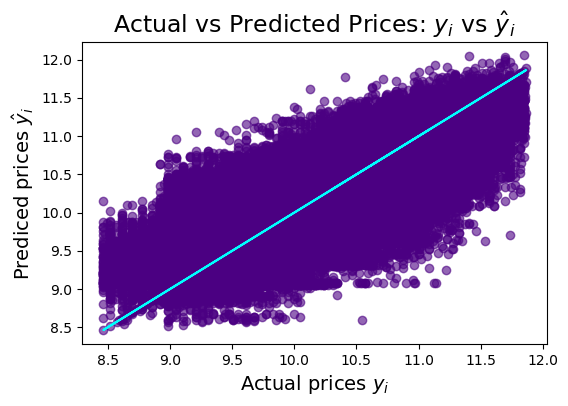

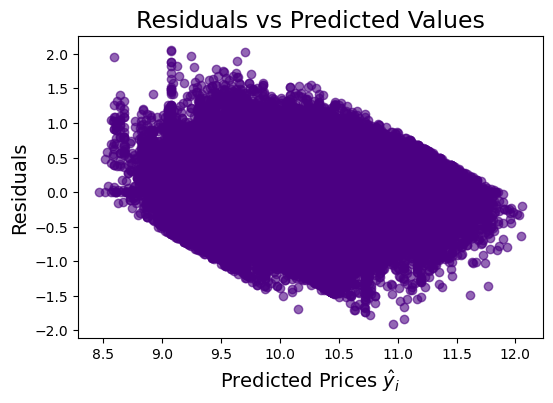

In [204]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices $y _i$', fontsize=14)
plt.ylabel('Prediced prices $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

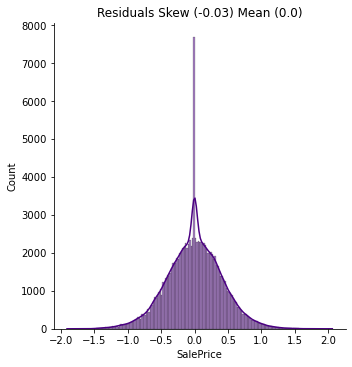

In [205]:
# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

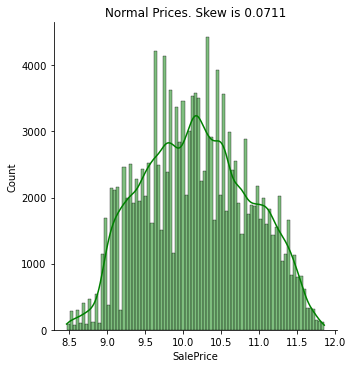

In [206]:
tgt_skew = y.skew()
sns.displot(y, kde='kde', color='green')
plt.title(f'Normal Prices. Skew is {tgt_skew:.3}')
plt.show()